# Machine Learning Regression - Predicting Energy Efficiency

## Dataset Information

https://archive.ics.uci.edu/ml/machine-learning-databases/00374

The dataset for the remainder of this quiz (from question 18) is the Appliances Energy Prediction data. The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters). The attribute information can be seen below.

### Attribute Information:

* Date, time year-month-day hour:minute:second

* Appliances, energy use in Wh 

* lights, energy use of light fixtures in the house in Wh

* T1, Temperature in kitchen area, in Celsius

* RH_1, Humidity in kitchen area, in %

* T2, Temperature in living room area, in Celsius

* RH_2, Humidity in living room area, in %

* T3, Temperature in laundry room area

* RH_3, Humidity in laundry room area, in %

* T4, Temperature in office room, in Celsius

* RH_4, Humidity in office room, in %

* T5, Temperature in bathroom, in Celsius

* RH_5, Humidity in bathroom, in %

* T6, Temperature outside the building (north side), in Celsius

* RH_6, Humidity outside the building (north side), in %

* T7, Temperature in ironing room , in Celsius

* RH_7, Humidity in ironing room, in %

* T8, Temperature in teenager room 2, in Celsius

* RH_8, Humidity in teenager room 2, in %

* T9, Temperature in parents room, in Celsius

* RH_9, Humidity in parents room, in %

* To, Temperature outside (from Chievres weather station), in Celsius

* Pressure (from Chievres weather station), in mm Hg

* RH_out, Humidity outside (from Chievres weather station), in %

* Wind speed (from Chievres weather station), in m/s

* Visibility (from Chievres weather station), in km

* Tdewpoint (from Chievres weather station), Â°C

* rv1, Random variable 1, nondimensional

* rv2, Random variable 2, nondimensional

In [1]:
# Iport data preprocessng and visualization libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import machine learning libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# Import Library to ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import the Appliances Energy Prediction Data
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv')
df.head()  

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [3]:
# Get the information of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [4]:
# Get the statiscal description of the columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Appliances,19735.0,97.694958,102.524891,10.000000,50.000000,60.000000,100.000000,1080.000000
lights,19735.0,3.801875,7.935988,0.000000,0.000000,0.000000,0.000000,70.000000
T1,19735.0,21.686571,1.606066,16.790000,20.760000,21.600000,22.600000,26.260000
RH_1,19735.0,40.259739,3.979299,27.023333,37.333333,39.656667,43.066667,63.360000
T2,19735.0,20.341219,2.192974,16.100000,18.790000,20.000000,21.500000,29.856667
RH_2,19735.0,40.420420,4.069813,20.463333,37.900000,40.500000,43.260000,56.026667
T3,19735.0,22.267611,2.006111,17.200000,20.790000,22.100000,23.290000,29.236000
RH_3,19735.0,39.242500,3.254576,28.766667,36.900000,38.530000,41.760000,50.163333
T4,19735.0,20.855335,2.042884,15.100000,19.530000,20.666667,22.100000,26.200000
RH_4,19735.0,39.026904,4.341321,27.660000,35.530000,38.400000,42.156667,51.090000


In [5]:
# Check for missing values in the columns
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

## Question 17

From the dataset, fit a linear model on the relationship between the temperature in the living room in Celsius (x = T2) and the temperature outside the building (y = T6). What is the Root Mean Squared error in three D.P?


**Ans:** B - 3.644

<Axes: xlabel='T2', ylabel='T6'>

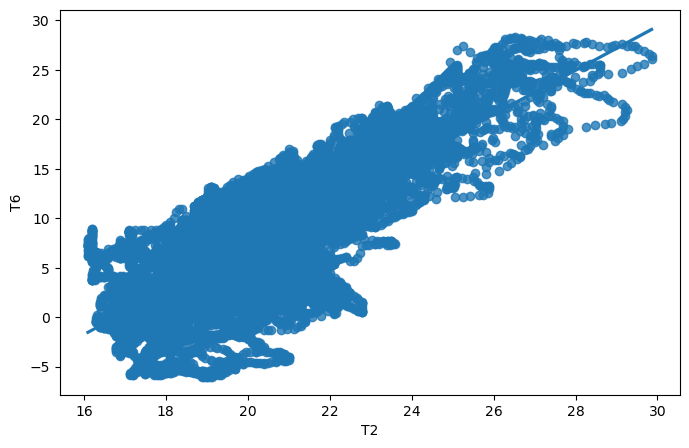

In [6]:
# Regression plot using seaborn (a visualization library)
plt.figure(figsize=(8,5))
sns.regplot(x='T2', y='T6', data=df)

In [7]:
# Store the training and testing sets for the independent variable (T2) and dependent variable (T6) respectively.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.T2, df.T6, test_size=0.3, random_state=42)

# Create an instance of the LinearRegression model and assigns it to the variable linear_model.
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

# Fit the model to the training test
linear_model.fit(x_train.values.reshape(-1, 1), y_train)

# Obtain predictions
predicted_values = linear_model.predict(x_test.values.reshape(-1, 1))

In [8]:
# Calculate Root Mean Squared Error
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
print('The Root Mean Squared Error is: ', round(rmse, 3)) # to 3 decimal places

The Root Mean Squared Error is:  3.63


## Question 18

Remove the following columns: [“date”, “lights”]. The target variable is “Appliances”. Use a 70-30 train-test set split with a  random state of 42 (for reproducibility). Normalize the dataset using the MinMaxScaler (Hint: Use the MinMaxScaler fit_transform and transform methods on the train and test set respectively). Run a multiple linear regression using the training set. Answer the following questions:

What is the Mean Absolute Error (in three decimal places) for the  training set?

**Ans:** B - 50.777 (though the correct answer is 0.05)

In [9]:
# Firstly, we normalize our dataset to a common scale using the min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = df.drop(columns=['date', 'lights'])
normalised_df = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
features_df = normalised_df.drop(columns = ['Appliances'])
target = normalised_df['Appliances']

# Store the training and testing sets for the independent variable (features_df) and dependent variable (target) 
# respectively.
# Recall that we had earlier segmented the features and target variables.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, target, train_size=0.7, random_state=42)

# Create an instance of the LinearRegression model and assigns it to the variable linear_model.
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

# Fit the model to the training set
linear_model.fit(x_train, y_train)

# Obtain predictions
predicted_values = linear_model.predict(x_train)

# Calculate Mean Absolute Error (MAE) for train test
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_train, predicted_values)
print('The Mean Absolute Error (MAE) is: ', round(mae, 3)) #to 2 decimal places

The Mean Absolute Error (MAE) is:  0.05


## Question 19

What is the Root Mean Squared Error (in three decimal places) for the training set?

**Ans:** D - 89.346 (though the correct answer is 0.089)

In [10]:
# Firstly, we normalize our dataset to a common scale using the min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = df.drop(columns=['date', 'lights'])
normalised_df = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
features_df = normalised_df.drop(columns = ['Appliances'])
target = normalised_df['Appliances']

# Store the training and testing sets for the independent variable (features_df) and dependent variable (target) 
# respectively.
# Recall that we had earlier segmented the features and target variables.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, target, train_size=0.7, random_state=42)

# Create an instance of the LinearRegression model and assigns it to the variable linear_model.
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

# Fit the model to the training set
linear_model.fit(x_train, y_train)

# Obtain predictions
predicted_values = linear_model.predict(x_train)

# Calculate Root Mean Squared Error for train test
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_train, predicted_values))
print('The Root Mean Squared Error is: ', round(rmse, 3)) # to 3 decimal places

The Root Mean Squared Error is:  0.089


## Question 20

What is the Mean Absolute Error (in three decimal places) for test set?

**Ans:** D - 89.346 (though the correct answer is 0.05)

In [11]:
# Firstly, we normalize our dataset to a common scale using the min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = df.drop(columns=['date', 'lights'])
normalised_df = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
features_df = normalised_df.drop(columns = ['Appliances'])
target = normalised_df['Appliances']

# Store the training and testing sets for the independent variable (features_df) and dependent variable (target) 
# respectively.
# Recall that we had earlier segmented the features and target variables.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, target, test_size=0.3, random_state=42)

# Create an instance of the LinearRegression model and assigns it to the variable linear_model.
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

# Fit the model to the training set
linear_model.fit(x_train, y_train)

# Obtain predictions
predicted_values = linear_model.predict(x_test)

# Calculate Mean Absolute Error (MAE) for test set
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
print('The Mean Absolute Error (MAE) is: ', round(mae, 3)) #to 2 decimal places

The Mean Absolute Error (MAE) is:  0.05


## Question 21

What is the Root Mean Squared Error (in three decimal places) for test set?

**Ans:** D - 89.346 (though the correct answer is 0.088)

In [12]:
# Firstly, we normalize our dataset to a common scale using the min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = df.drop(columns=['date', 'lights'])
normalised_df = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
features_df = normalised_df.drop(columns = ['Appliances'])
target = normalised_df['Appliances']

# Store the training and testing sets for the independent variable (features_df) and dependent variable (target) 
# respectively.
# Recall that we had earlier segmented the features and target variables.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, target, test_size=0.3, random_state=42)

# Create an instance of the LinearRegression model and assigns it to the variable linear_model.
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

# Fit the model to the training set
linear_model.fit(x_train, y_train)

# Obtain predictions
predicted_values = linear_model.predict(x_test)

# Calculate Root Mean Squared Error for the test set
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
print('The Root Mean Squared Error is: ', round(rmse, 3)) # to 3 decimal places

The Root Mean Squared Error is:  0.088


## Question 22

Did the Model above overfit to the training set?

**Ans:** B - No

## Question 23

Train a ridge regression model with default parameters. Is there any change to the root mean squared error (RMSE) when evaluated on the test set?

**Ans:** B - No

In [13]:
# Create an instance of the Ridge Regression model with default parameters
ridge_model = Ridge()

# Train the Ridge model on the training set
ridge_model.fit(x_train, y_train)

# Make predictions on the test set
ridge_predicted_values = ridge_model.predict(x_test)

# Calculate the RMSE for the test set
rmse_ridge = np.sqrt(mean_squared_error(y_test, ridge_predicted_values))

print('RMSE for Ridge Regression Model on Test Set:', rmse_ridge)

RMSE for Ridge Regression Model on Test Set: 0.08758472277343123


## Question 24

Train a lasso regression model with default value and obtain the new feature weights with it. How many of the features have non-zero feature weights?

**Ans:** B - 4 0r 5 (though the correct answer is 0)

In [14]:
from sklearn.linear_model import Lasso

# Create an instance of the Lasso Regression model with default parameters
lasso_model = Lasso()

# Train the Lasso model on the training set
lasso_model.fit(x_train, y_train)

# Get the feature weights (coefficients)
lasso_feature_weights = lasso_model.coef_

# Count the number of non-zero feature weights
non_zero_feature_count = np.sum(lasso_feature_weights != 0)

print('Number of features with non-zero feature weights:', non_zero_feature_count)

Number of features with non-zero feature weights: 0


## Question 25

What is the new RMSE with the Lasso Regression on the test set?

**Ans:** D - 93.892 (though the correct answer is 0.09)

In [15]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Make predictions on the test set using the Lasso Regression model
lasso_predicted_values = lasso_model.predict(x_test)

# Calculate the RMSE for the Lasso Regression model on the test set
rmse_lasso = np.sqrt(mean_squared_error(y_test, lasso_predicted_values))

print('RMSE for Lasso Regression Model on Test Set:', rmse_lasso)

RMSE for Lasso Regression Model on Test Set: 0.09486157889204758
